In [1]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get the Data 
uber_drives = pd.read_csv('C:/Users/admin/Desktop/Python/uberdrive.csv')

In [3]:
## Last 5 records
uber_drives.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Karachi,Karachi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Karachi,Karachi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Karachi,Karachi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Karachi,Karachi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [4]:
uber_drives.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [5]:
# gives us the dimension of the dataset
print(uber_drives.shape)

(1156, 7)


In [6]:
print (uber_drives.size) ## rows * columns

8092


In [7]:
#get more information about data
uber_drives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE*    1156 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1156 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
# See if any value is missing 
uber_drives.isnull().values.any()

True

In [12]:
## how many missing values
uber_drives.isnull().values.sum() 

507

In [13]:
# Get the initial data with dropping the NA values
uber_drives = uber_drives.dropna()

In [14]:
# See if any value is missing 
uber_drives.isnull().values.any()

False

In [15]:
#get the summary of data
uber_drives.describe() ## Miles is the only numerical column

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [16]:
#for similicity lets give uber_drives dataframe give a name df 
df = uber_drives

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    653 non-null object
END_DATE*      653 non-null object
CATEGORY*      653 non-null object
START*         653 non-null object
STOP*          653 non-null object
MILES*         653 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [18]:
#1. Destination (start and stop)

# Get the starting destination, unique destination
start_destination = uber_drives['START*'].dropna()
print(start_destination.head())

0        Fort Pierce
2        Fort Pierce
3        Fort Pierce
4        Fort Pierce
5    West Palm Beach
Name: START*, dtype: object


In [19]:
unique_start = set(start_destination) ## set returns unique 
print(unique_start)

{'Whitebridge', 'Katunayaka', 'Weston', 'Latta', 'Townes at Everett Crossing', 'New Orleans', 'Washington Avenue', 'Oakland', 'Arabi', 'Northwoods', 'Flatiron District', 'Katy', 'Galveston', 'Topton', 'Eastgate', 'Renaissance', 'Chalmette', 'Bellevue', 'Chapel Hill', 'Austin', 'Huntington Woods', 'Boone', 'Parkway', 'Newark', 'Hazelwood', 'Kenner', 'Lake Reams', 'Preston', 'Burtrose', 'Lake Wellingborough', 'Lexington Park at Amberly', 'East Elmhurst', 'Soho', 'East Austin', 'South Congress', 'San Francisco', 'Rawalpindi', 'Tribeca', 'Holly Springs', 'Rose Hill', 'Karachi', 'Sunnyvale', 'Berkeley', 'Mcvan', 'Meredith', 'Katunayake', 'Daytona Beach', 'Farmington Woods', 'Financial District', 'Gampaha', 'New York', 'Fayetteville Street', 'North Austin', 'Hudson Square', 'Kissimmee', 'Chessington', 'Raleigh', 'Jacksonville', 'Emeryville', 'Parkwood', 'Fairmont', 'Elmhurst', 'Lower Manhattan', 'Metairie', 'Downtown', 'West Palm Beach', 'Midtown East', 'Morrisville', 'R?walpindi', 'Westpark

In [20]:
print (len(unique_start))

131


In [21]:
# Get the stop destination, unique destination
stop_destination = uber_drives['STOP*'].dropna() ## set returns unique 
unique_stop = set(stop_destination)
print (len(unique_stop))

137


In [22]:
unique_stop

{'Agnew',
 'Alief',
 'Apex',
 'Arabi',
 'Asheville',
 'Banner Elk',
 'Bay Farm Island',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Burtrose',
 'Capitol One',
 'Cary',
 'Cedar Hill',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'Colombo',
 'Congress Ave District',
 'Convention Center District',
 'Coxville',
 'Daytona Beach',
 'Depot Historic District',
 'Downtown',
 'Durham',
 'East Harlem',
 'Edgehill Farms',
 'El Cerrito',
 'Emeryville',
 'Faubourg Marigny',
 'Financial District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Gramercy-Flatiron',
 'Greater Greenspoint',
 'Gulfton',
 'Harden Place',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Hog Island',
 'Holly Springs',
 'Houston',
 'Hudson Square',
 'Ilukwatta',
 'Islamabad',
 'Jacksonville',
 'Jamaica',
 'Jamestown Court',
 'Karachi',
 'Katunayaka',
 'Katy',
 'Kenner',
 'Kildaire Farms',
 'Kips Bay',
 'Kissimmee',
 'Lahore',
 'Lake Reams',
 'Lakeview',
 'Latta',
 'Leesville Hollow'

In [23]:
temp = uber_drives[uber_drives['START*'] == 'San Francisco']
temp

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11-09-2016 18:40,11-09-2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11-10-2016 15:17,11-10-2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


In [24]:
# Here, trying to look at the trips count for start destinations

location_start = []
for i in unique_start:
    temp = uber_drives[uber_drives['START*'] == i]
    location_start.append(len(temp))

df2 = pd.DataFrame(location_start, index = unique_start, columns = pd.Index(['Trips']))
df2

,Trips
Whitebridge,36
Katunayaka,2
Weston,1
Latta,1
Townes at Everett Crossing,1
New Orleans,2
Washington Avenue,1
Oakland,4
Arabi,1
Northwoods,2


In [25]:
df2.sort_values(['Trips'], ascending=False, inplace=True)
df2.head(5)

# We can say that Cary is most poplular starting points for this driver.

,Trips
Cary,161
Unknown Location,55
Morrisville,54
Whitebridge,36
Durham,30


In [26]:
# In the similar way, trying to look at the trips count for stop destinations

location_end = []
for i in unique_stop:
    temp = uber_drives[uber_drives['STOP*'] == i]
    location_end.append(len(temp))

df3 = pd.DataFrame(location_end, index = unique_stop, columns = pd.Index(['Trips']))

df3.sort_values(['Trips'], ascending=False, inplace=True)
df3.head(5)

#We can say the Cary is most popular dropping point also for this driver.

,Trips
Cary,155
Morrisville,60
Unknown Location,56
Whitebridge,37
Durham,30


In [27]:
#Trying to find out most farthest start and stop pair.
#Dropping Unknown Location Value
df = uber_drives

## Creating a subset of the data excluding (Start and Stop ==Unknown)
df2 = df[df['START*']!= 'Unknown Location']
df2 = df2[df2['STOP*']!= 'Unknown Location']

df2.groupby(['START*','STOP*']).size().sort_values(ascending=False)

## People from Cary going to Morrisville are the most frequent users of Uber

START*                     STOP*            
Cary                       Morrisville          52
Morrisville                Cary                 51
Cary                       Cary                 44
                           Durham               30
Durham                     Cary                 29
Karachi                    Karachi              20
Cary                       Raleigh              17
Lahore                     Lahore               16
Raleigh                    Cary                 15
Cary                       Apex                 11
Apex                       Cary                 10
Westpark Place             Whitebridge           5
Islamabad                  Islamabad             4
Orlando                    Kissimmee             4
Raleigh                    Morrisville           4
Whitebridge                Wayne Ridge           4
                           Waverly Place         4
Edgehill Farms             Whitebridge           4
Whitebridge                Tanglewood

In [28]:
#Trying to find out most popular start and stop pair.
uber_drives
df2.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False)

START*                STOP*                  
Cary                  Durham                     312.3
Latta                 Jacksonville               310.3
Durham                Cary                       298.4
Cary                  Morrisville                293.7
Raleigh               Cary                       269.5
Morrisville           Cary                       250.6
Cary                  Cary                       233.9
                      Raleigh                    230.4
Jacksonville          Kissimmee                  201.0
Boone                 Cary                       180.2
Jacksonville          Ridgeland                  174.2
Florence              Cary                       159.3
Cary                  Latta                      144.0
Ridgeland             Florence                   144.0
Austin                Katy                       136.0
Winston Salem         Asheville                  133.6
Cary                  Winston Salem              107.0
Asheville          

In [30]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit
10,01-10-2016 15:08,01-10-2016 15:51,Business,New York,Queens,10.8,Meeting


In [33]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [34]:
#pd.to_datetime(start_date).month # Get the Day/Month/Year from the Series
#pd.to_datetime(uber_drives['START_DATE*']).dt.month # Get the Day/Month/Year from the DataFrame

Jan = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 1] ## capture all Jan Data ...
Feb = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 2]
Mar = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 3]
Apr = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 4]
May = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 5]
Jun = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 6]
Jul = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 7]
Aug = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 8]
Sep = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 9]
Oct = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 10]
Nov = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 11]
Dec = uber_drives[pd.to_datetime(uber_drives['START_DATE*']).dt.month == 12]

In [35]:
Jan

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit
10,01-10-2016 15:08,01-10-2016 15:51,Business,New York,Queens,10.8,Meeting


In [36]:
# We will create the day wise dataframes to get the understanding of daywise spread of trips across every month.
Jan.loc[:,'day'] = pd.to_datetime(Jan['START_DATE*']).dt.day
Feb.loc[:,'day'] = pd.to_datetime(Feb['START_DATE*']).dt.day
Mar.loc[:,'day'] = pd.to_datetime(Mar['START_DATE*']).dt.day
Apr.loc[:,'day'] = pd.to_datetime(Apr['START_DATE*']).dt.day
May.loc[:,'day'] = pd.to_datetime(May['START_DATE*']).dt.day
Jun.loc[:,'day'] = pd.to_datetime(Jun['START_DATE*']).dt.day
Jul.loc[:,'day'] = pd.to_datetime(Jul['START_DATE*']).dt.day
Aug.loc[:,'day'] = pd.to_datetime(Aug['START_DATE*']).dt.day
Sep.loc[:,'day'] = pd.to_datetime(Sep['START_DATE*']).dt.day
Oct.loc[:,'day'] = pd.to_datetime(Oct['START_DATE*']).dt.day
Nov.loc[:,'day'] = pd.to_datetime(Nov['START_DATE*']).dt.day
Dec.loc[:,'day'] = pd.to_datetime(Dec['START_DATE*']).dt.day

# Getting the sum of trips each month, day wise. (only miles and diff can be added) Look out for 6th, 7th, 10th Jan etc
Jan_group = Jan.groupby(['day']).agg('sum') ## we have aggregated MILES and DIFF as these are only 2 columns which we can aggregate
Feb_group = Feb.groupby(['day']).agg('sum')
Mar_group = Mar.groupby(['day']).agg('sum')
Apr_group = Apr.groupby(['day']).agg('sum')
May_group = May.groupby(['day']).agg('sum')
Jun_group = Jun.groupby(['day']).agg('sum')
Jul_group = Jul.groupby(['day']).agg('sum')
Aug_group = Aug.groupby(['day']).agg('sum')
Sep_group = Sep.groupby(['day']).agg('sum')
Oct_group = Oct.groupby(['day']).agg('sum')
Nov_group = Nov.groupby(['day']).agg('sum')
Dec_group = Dec.groupby(['day']).agg('sum')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
Jan_group

,MILES*
day,
1,5.1
2,4.8
5,4.7
6,75.1
7,0.8
10,49.3
11,11.6
12,27.2
13,23.0


In [38]:
Jan_group['MILES*'].sum()

500.70000000000005

In [40]:
#Now  creating dataframe the sum of miles covered for each month and plotting it.
miles_day_frame = pd.concat([Jan_group['MILES*'], Feb_group['MILES*'],Mar_group['MILES*'],Apr_group['MILES*'],May_group['MILES*'],Jun_group['MILES*'],Jul_group['MILES*'],Aug_group['MILES*'],Sep_group['MILES*'],Oct_group['MILES*'],
               Nov_group['MILES*'],Dec_group['MILES*']],ignore_index=True, axis=1) ## axis=1, add along the columns


miles_day_frame.columns = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
miles_day_frame.fillna(0,inplace=True)

In [41]:
miles_day_frame

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
day,,,,,,,,,,,,
1,5.1,46.6,16.0,46.8,18.9,16.3,54.9,0.0,0.0,0.0,4.2,16.8
2,4.8,15.9,0.0,476.0,6.1,0.0,20.0,8.4,0.0,0.0,8.5,16.7
3,0.0,0.0,32.4,159.3,2.5,38.4,16.1,0.0,0.0,0.0,6.2,9.6
4,0.0,35.9,79.9,0.0,32.7,0.0,39.2,0.0,0.0,0.0,7.9,6.3
5,4.7,20.8,26.0,7.9,30.0,41.7,11.7,0.0,0.0,0.0,0.0,3.8
6,75.1,23.6,0.0,8.0,39.3,38.6,22.6,0.0,0.0,0.0,46.7,0.0
7,0.8,23.5,42.4,12.2,0.0,20.3,7.9,5.2,0.0,0.0,25.0,24.5
8,0.0,7.0,14.8,58.7,0.0,43.7,0.0,5.9,0.0,0.0,23.5,10.8
9,0.0,6.1,0.0,0.0,56.3,0.0,0.0,0.0,0.0,7.7,18.2,38.4


In [42]:
#Sum of miles covered for each month
print(miles_day_frame.sum(axis = 0).sort_values(ascending = False)) ## axis=0 indicates that add row wise
#We can say that driver has covered most miles in march month.

Mar    1455.9
Apr    1094.9
Dec     924.4
Feb     727.2
Nov     635.4
Jun     541.0
Jan     500.7
Oct     496.8
Jul     488.3
May     358.5
Aug      88.1
Sep       0.0
dtype: float64


In [43]:
print(miles_day_frame.sum(axis = 1).sort_values(ascending = False)) ## axis=0 indicates that add row wise

day
25    759.4
28    572.3
2     556.4
17    456.8
19    330.1
21    328.5
3     264.5
20    257.9
6     253.9
14    252.8
29    247.3
22    244.0
11    228.0
1     225.6
4     201.9
18    192.4
10    190.1
12    172.2
8     164.4
7     161.8
5     146.6
31    146.4
15    142.3
9     126.7
13    126.4
27    108.9
26    107.0
16     96.7
30     88.7
24     81.9
23     79.3
dtype: float64


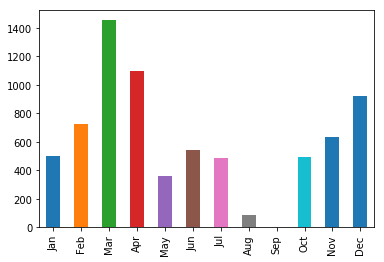

In [44]:
miles_day_frame.sum(axis = 0).plot(kind = 'bar')  ### do it month wise total number of trips.
plt.show()

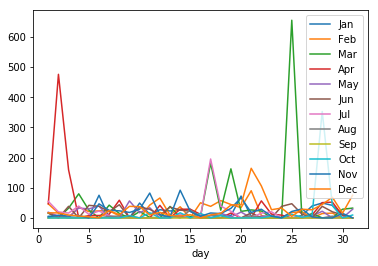

In [45]:
miles_day_frame.plot()  ## number of trips day wise
plt.show()

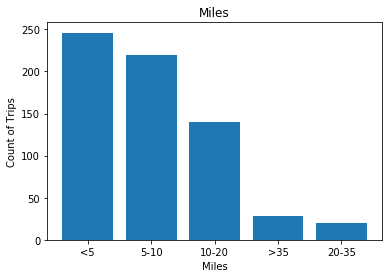

In [47]:
# Miles calculations
# Miles Range (Trying to put the miles covered in different buckets)

range_ = ["<5","5-10","10-20","20-35",">35"]

dict_range = dict()
for x in range_:
    dict_range[x] = 0

for i in uber_drives['MILES*']:
    if i < 5:
        dict_range["<5"] += 1
    elif i < 10:
        dict_range["5-10"] += 1
    elif i < 20:
        dict_range["10-20"] += 1
    elif i < 35:
        dict_range["20-35"] += 1
    else:
        dict_range[">35"] += 1
    
miles = pd.Series(dict_range)
miles.sort_values(inplace=True, ascending=False)

X = plt.bar(range(1,len(miles.index)+1),miles.values)
plt.title("Miles")
plt.xlabel("Miles")
plt.ylabel("Count of Trips")
plt.xticks(range(1,len(miles.index)+1),miles.index)
plt.show()  

In [48]:
miles = pd.Series(dict_range)
miles
miles.index

Index(['<5', '5-10', '10-20', '20-35', '>35'], dtype='object')

In [50]:
#4. Purpose
uber_drives.info()
uber_drives['PURPOSE*'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    653 non-null object
END_DATE*      653 non-null object
CATEGORY*      653 non-null object
START*         653 non-null object
STOP*          653 non-null object
MILES*         653 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


array(['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

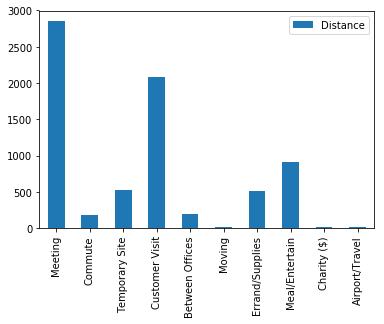

In [51]:
# Proportion of distance spent for each activities
purpose = set(uber_drives['PURPOSE*'])
total_dist = []

for i in purpose:
    temp = uber_drives[uber_drives['PURPOSE*'] == i]
    total_dist.append(sum(temp['MILES*']))

df = pd.DataFrame(total_dist, index = purpose, columns = pd.Index(['Distance']))
df.plot(kind='bar')
plt.show()

In [52]:
df

,Distance
Meeting,2851.3
Commute,180.2
Temporary Site,523.7
Customer Visit,2089.5
Between Offices,197.0
Moving,18.2
Errand/Supplies,508.0
Meal/Entertain,911.7
Charity ($),15.1
Airport/Travel,16.5


In [53]:
uber_drives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    653 non-null object
END_DATE*      653 non-null object
CATEGORY*      653 non-null object
START*         653 non-null object
STOP*          653 non-null object
MILES*         653 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


Business    647
Personal      6
Name: CATEGORY*, dtype: int64


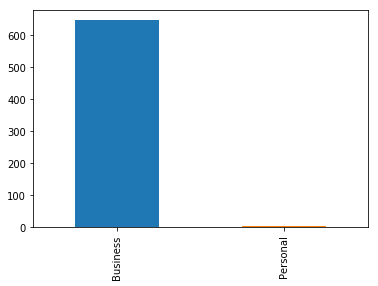

In [54]:
# plot number of trip at each category
x = uber_drives['CATEGORY*'].value_counts()
print(x)
x.plot(kind = 'bar')
plt.show()

#Now lets try to answer some questions from this data.

#Question1: How many miles was earned per category and purpose ?

#Question2: What is percentage of business miles vs personal?

#Question3: How much time was spend for drives per category and purpose?

In [55]:
# Question 1:

df = uber_drives
df.groupby(['CATEGORY*', 'PURPOSE*'])['MILES*'].sum()

CATEGORY*  PURPOSE*       
Business   Airport/Travel       16.5
           Between Offices     197.0
           Customer Visit     2089.5
           Errand/Supplies     508.0
           Meal/Entertain      911.7
           Meeting            2851.3
           Temporary Site      523.7
Personal   Charity ($)          15.1
           Commute             180.2
           Moving               18.2
Name: MILES*, dtype: float64

In [56]:
#Question2:
df = uber_drives
df.groupby(['CATEGORY*'])['MILES*'].sum() / df['MILES*'].sum() ## sum of miles for each category divided by total miles
#97% of Miles was earned by business trips

CATEGORY*
Business    0.970798
Personal    0.029202
Name: MILES*, dtype: float64

[12, 11, 10, 1000, 10010]